In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_curve, auc, plot_roc_curve, plot_confusion_matrix
# from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.inspection import plot_partial_dependence
# from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

# import xgboost as xgb

In [15]:
data = pd.read_csv('Model_data.csv')

In [16]:
data.Balance = data.Balance.astype('int32') #Truncating decimals
data.drop(data.Gender[data.Gender== 'O'].index, axis = 0, inplace= True) # Removed 196 rows with `Gender` = 'O'

In [17]:
from imblearn.under_sampling import NearMiss

In [18]:
# A class for pretty printing
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
    
# function for validation on test data   
def classification_report(y_true, y_prediction, type_of_data='Enter Over/Under/Original sampled', type_of_classifier='ClassifierName'):
    """Print Classification report"""
    
    accuracy = accuracy_score(y_true, y_prediction)
    precision = precision_score(y_true, y_prediction)
    recall = recall_score(y_true, y_prediction)
    f1 = f1_score(y_true, y_prediction)
    
    print('Classification Report on Testing Data:\n'+ color.BOLD + type_of_data, 'data\n'+color.END+color.RED+color.BOLD+type_of_classifier,'Classifier'+color.END+color.END)
    print()
    print('---------------------------------------')
    print(color.BOLD + 'Recall: %s' %recall + color.END)
    print('Precision: %s' %precision)
    print('F1 score: %s' %f1)
    print('Accuracy: %s' %accuracy)
    print('---------------------------------------')
    print()


# A function for cross-validation report    
def cross_val_report(classifier, train_data, train_label, cv=10, scoring=['recall','precision', 'f1','accuracy']):
    
    score = cross_validate(classifier, train_data, train_label, cv=cv, scoring= scoring)
    recall = np.mean(score['test_recall'])
    precision = np.mean(score['test_precision'])
    f1 = np.mean(score['test_f1'])
    accuracy= np.mean(score['test_accuracy'])
    print('Cross Validation Report')
    print(color.BOLD + 'Recall: %s' %recall + color.END)
    print('Precision: %s' %precision)
    print('F1: %s' %f1)
    print('Accuracy: %s' %accuracy)
    print()
    print("*Mean values presented")
    print('---------------------------------------')

In [19]:
df = pd.get_dummies(data, columns=['Gender','Occupation'], drop_first = True)
# df['SCR_balanced'] = df.SCR.apply(lambda x: (x/1000))
# df.drop(columns=['SCR'], inplace=True)
df.head()

,Target,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period,Gender_M,Occupation_SAL,Occupation_SELF-EMP,Occupation_SENP
0,0,41,91519,38,926,15,1,0,1,0
1,0,52,117288,17,768,13,1,1,0,0
2,0,31,259827,8,816,5,0,0,0,1
3,0,45,26677,14,353,18,0,0,0,0
4,0,39,43440,1,751,31,0,0,0,1


In [20]:
X_original = df.iloc[:,1:]
y_original = df.iloc[:,0]
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_original,y_original, shuffle = ['True'], stratify=y_original)

In [21]:
X_over_train, y_over_train = SMOTE().fit_resample(X_train_orig, y_train_orig)

Classification Report on Testing Data:
Oversampled data
KNN Classifier

---------------------------------------
Recall: 0.5105386416861827
Precision: 0.14829931972789115
F1 score: 0.2298365840801265
Accuracy: 0.7049080993738639
---------------------------------------



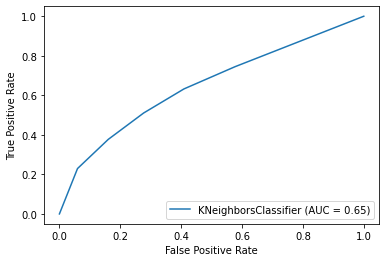

In [28]:
clf_KNN2 = KNeighborsClassifier(n_neighbors = 5)
clf_KNN2.fit(X_over_train, y_over_train)
y_predict= clf_KNN2.predict(X_test_orig)
classification_report(y_test_orig, y_predict, 'Oversampled', 'KNN')
plot_roc_curve(clf_KNN2, X_test_orig, y_test_orig)

# cross_val_report(clf_KNN2, X_over_train, y_over_train)

In [10]:
X_under_train, y_under_train = NearMiss().fit_resample(X_train_orig, y_train_orig)

Classification Report on Testing Data:
original data
KNN Classifier

---------------------------------------
Recall: 0.06557377049180328
Precision: 0.2978723404255319
F1 score: 0.10748560460652593
Accuracy: 0.9060795798828519
---------------------------------------



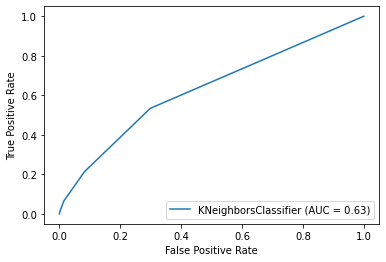

In [11]:
knn = KNeighborsClassifier()
knn.fit(X_train_orig, y_train_orig)
y_predict = knn.predict(X_test_orig)
classification_report(y_test_orig, y_predict, 'original', 'KNN')
plot_roc_curve(knn, X_test_orig, y_test_orig)

# cross_val_report(clf_KNN2, X_over_train, y_over_train)

Classification Report on Testing Data:
under data
KNN Classifier

---------------------------------------
Recall: 0.7517564402810304
Precision: 0.08201328564128768
F1 score: 0.14789219073946094
Accuracy: 0.25287820642294484
---------------------------------------



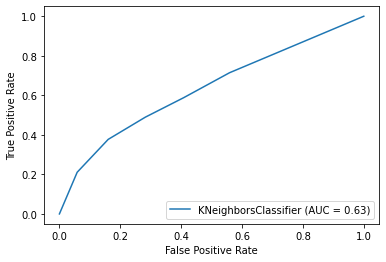

In [12]:
knn1 = KNeighborsClassifier()
knn1.fit(X_under_train, y_under_train)
y_predict = knn1.predict(X_test_orig)
classification_report(y_test_orig, y_predict, 'under', 'KNN')
plot_roc_curve(clf_KNN2, X_test_orig, y_test_orig)

# cross_val_report(clf_KNN2, X_over_train, y_over_train)